# make plot CuT 1e-9 ENT=1e-5

In [1]:
% housekeeping
% clear data and number format
clear; format short e
% turn off warnings
warning off
graphics_toolkit ("notebook"); 
%graphics_toolkit ("plotly"); 
% setup environment
% set path to equilibrium solver
txt=pwd;
n=length(txt);
rootpath=txt(1:n-12);
PHREEQCpath=[rootpath,'/runPHREEQC'];
addpath(PHREEQCpath);
JEQUILIBpath=[rootpath,'/JEQUILIB']; addpath(JEQUILIBpath);
Cumodelspath=[rootpath,'/Cu_EN']; addpath(Cumodelspath);

In [2]:
% set constants

pHv=2:0.25:10; CuT=1e-9; ENT=1e-5;

In [3]:
% make model with higher resolutions so plot line is smooth

% MODEL FOR COMPARISON
%model with just inorganic speciation
%geochemical model
% input the constants and solution chemistry

flag1=2; %flag1 for concentration based search vector (1) or for log based search vector (2).
flag2=1; %flag2 for numerical derivatives (2) or analtyical derivatives (1)
database=[]; 
flag3=0; % flag3 1 for show warnings. 0 no warnings
flag4=0; %if=1 solve tableau one line at a time to get a good initial guess (no solids). really challenging probs only
flag5=0; %if=1 use stored initial guess for including solids

inorganicTOTALS=[CuT ENT];
inorganicTOTALS(inorganicTOTALS==0)=1e-16; % get rid of zero values, b/c div by zero error
TOTALS=[inorganicTOTALS]; %TOTALS=inorganicTOTALS;

for i=1:length(pHv);
    pH=pHv(i); pe=20.75-pH; PCO2=10^-3.5;
    [Cuall(i),CuOH,CuOH2s,CuOs,CuCO3s,tenorite,malachite,MASSERR]=CuOHCO2open_EN_allsolids(pH,pe,PCO2,TOTALS',flag1,flag2,flag3,flag4,flag5,database);
end


In [4]:
% experimental data
pH1=[10.034 8.122 6.023 4.058 2.02];
logCuA1=[-12.1182	-10.1858	-9.44595	-9.4223 	-9];
logCuB1=[-17.2331	-14.1047	-9.63176	-9.15203	-9];
logCumodel1=[-18.0821	-14.9125	-9.85439	-9.00045	-9]

pH2=[9.57 7.97 7.153 3.11 2.092];
logCuA2=[-16.0845	-13.5405	-11.6892	-9.08784	-9];
logCuB2=[-18.5372	-15.75	-13.6014	-8.92568	-9];
logCumodel2=[-17.5472	-14.5953	-12.7105	-9.00002	-9];

logCumodel1,1,2,3,4,5
1,-18.0821,-14.9125,-9.85439,-9.00045,-9


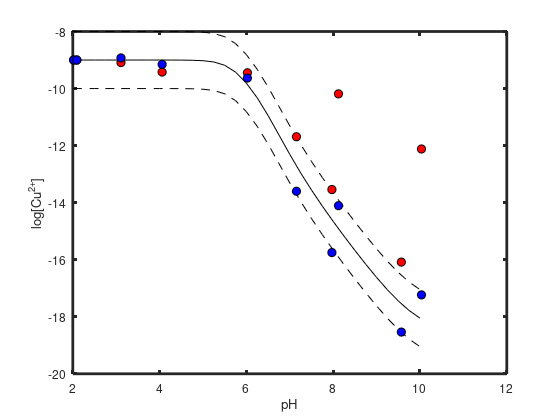

In [5]:
% make plot

plot(pHv,log10(Cuall),'k-', pHv,log10(Cuall*10),'k--', pHv,log10(Cuall./10),'k--')
hold on
plot(pH1,logCuA1,'ko','markerfacecolor','r')
plot(pH2,logCuA2,'ko','markerfacecolor','r')
plot(pH1,logCuB1,'ko','markerfacecolor','b')
plot(pH2,logCuB2,'ko','markerfacecolor','b')
xlabel('pH'); ylabel('log[Cu^{2+}]')
set(gca,'linewidth',2,'fontsize',12)

In [6]:
pH1
logCuA1
logCuB1

pH2
logCuB1
logCuB2

pHv'
log10(Cuall)

pH1,1,2,3,4,5
1,10.034,8.122,6.023,4.058,2.02


logCuA1,1,2,3,4,5
1,-12.1182,-10.1858,-9.44595,-9.4223,-9


logCuB1,1,2,3,4,5
1,-17.2331,-14.1047,-9.63176,-9.15203,-9


pH2,1,2,3,4,5
1,9.57,7.97,7.153,3.11,2.092


logCuB1,1,2,3,4,5
1,-17.2331,-14.1047,-9.63176,-9.15203,-9


logCuB2,1,2,3,4,5
1,-18.5372,-15.75,-13.6014,-8.92568,-9


ans,1
1,2
2,2.25
3,2.5
4,2.75
5,3
6,3.25
7,3.5
8,3.75
9,4
10,4.25


ans,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33
1,-9,-9,-9,-9.00001,-9.00002,-9.00003,-9.00006,-9.00015,-9.00036,-9.00096,-9.0027,-9.00789,-9.0234,-9.06811,-9.18364,-9.42484,-9.81202,-10.3269,-10.9467,-11.6273,-12.3095,-12.9561,-13.5582,-14.1223,-14.6585,-15.1745,-15.6746,-16.1585,-16.6218,-17.0557,-17.4472,-17.7818,-18.0505


In [7]:
logCuA1=[-12.1182	-10.1858	-9.44595	-9.4223 	-9];
logCuB1=[-17.2331	-14.1047	-9.63176	-9.15203	-9];
logCumodel1=[-18.0821	-14.9125	-9.85439	-9.00045	-9]

y = 10.^(logCuB1)
ymodel = 10.^(logCumodel1)

function R2=getR2(y,ymodel)
residuals=y-ymodel;
residualsT=y-mean(y);
SStot=sum(residualsT.^2)
SSres=sum(residuals.^2)
R2=1-(SSres/SStot)
end

logCumodel1,1,2,3,4,5
1,-18.0821,-14.9125,-9.85439,-9.00045,-9


y,1,2,3,4,5
1,5.84655e-18,7.85778e-15,2.33475e-10,7.04644e-10,1e-09


ymodel,1,2,3,4,5
1,8.27752e-19,1.22321e-15,1.39833e-10,9.98964e-10,1e-09
